In [1]:
from netCDF4 import Dataset
import datetime
import matplotlib
import pandas as pd
import os
import numpy as np
from scipy.signal import argrelextrema
import pickle
from ll_xy import lonlat_to_xy
import warnings
import matplotlib.pyplot as plt
import kuka_tools as kt
# You can find kuka_tools at https://github.com/robbiemallett/custom_modules/blob/master/kuka_tools.py

In [2]:
directory = '/media/robbie/One Touch/KUKA/PROCESSED/20231002'

pits = {}

Text(0, 0.5, 'y distance (m)')

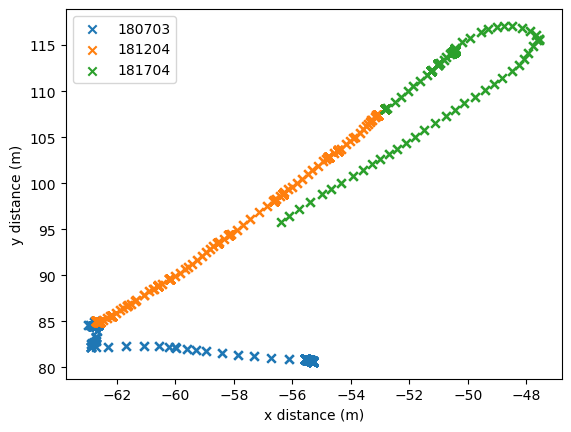

In [3]:
x0,y0 = 0,0

def plot_pos(file,plot=True,x0=0,y0=0):
    
    d = Dataset(f'{directory}/{file}')
    x, y = kt.lonlat_to_xy(np.array(d['lon']), np.array(d['lat']),hemisphere='s')
    y = y[np.abs(x)>10_000] -y0
    x = x[np.abs(x)>10_000] -x0
    if plot:
        plt.scatter(x,y,marker='x',label=file[-9:-3])

    return (x,y)

x,y=plot_pos('kuka_stare_decon_Ka-Scat20231002-135503.nc',plot=False)

x0 = x[0]; y0 = y[0]


# plot_pos('kuka_stare_decon_Ka-Scat20231002-180203.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231002-180703.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231002-181204.nc',x0=x0,y0=y0)
plot_pos('kuka_stare_decon_Ka-Scat20231002-181704.nc',x0=x0,y0=y0)

plt.legend()
plt.xlabel('x distance (m)')
plt.ylabel('y distance (m)')

# plt.xlim(-20,5)
# plt.ylim(-20,5)

In [4]:
pits = {}

In [5]:
# # Offset between Ka & ku
fa = 'kuka_stare_decon_Ka-Scat20231002-181204.nc'

fu = 'kuka_stare_decon_Ku-Scat20231002-181013.nc'

ka = Dataset(f'{directory}/{fa}')['start_time'][0]
ku = Dataset(f'{directory}/{fu}')['start_time'][0]
ka-ku

110.79099631309509

[]

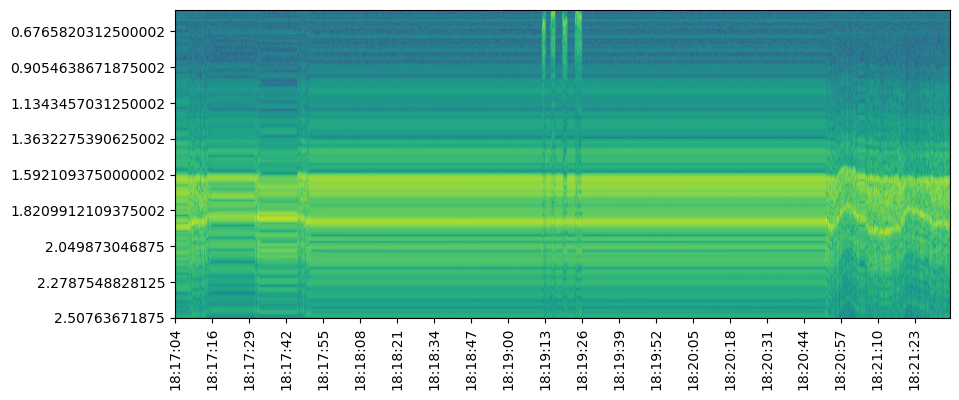

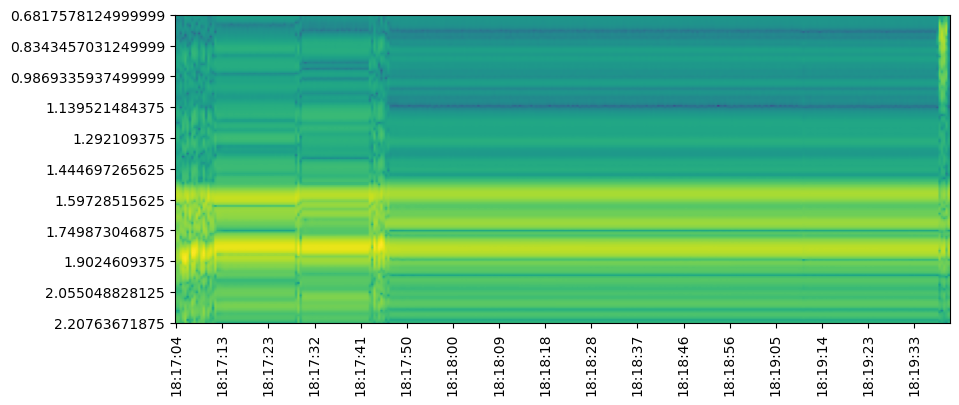

In [6]:
fa = 'kuka_stare_decon_Ka-Scat20231002-181704.nc'

fu = 'kuka_stare_decon_Ku-Scat20231002-181513.nc'

time_addition = datetime.timedelta(seconds=0)

ka_times = [(37,55)]
vlines = [datetime.datetime(2023,10,3,10,a,b)+time_addition for (a,b) in ka_times]
            # (30,30), (31,12)

kt.plot_file(fa,'ka',time_offset_s=0,vlines = vlines,directory=directory)

ku_times = []
vlines = [datetime.datetime(2023,10,2,11,a,b)+time_addition for (a,b) in ku_times]

kt.plot_file(fu,'ku',time_offset_s=-0+111,vlines=vlines,directory=directory)

datetime.timedelta(seconds=21109)

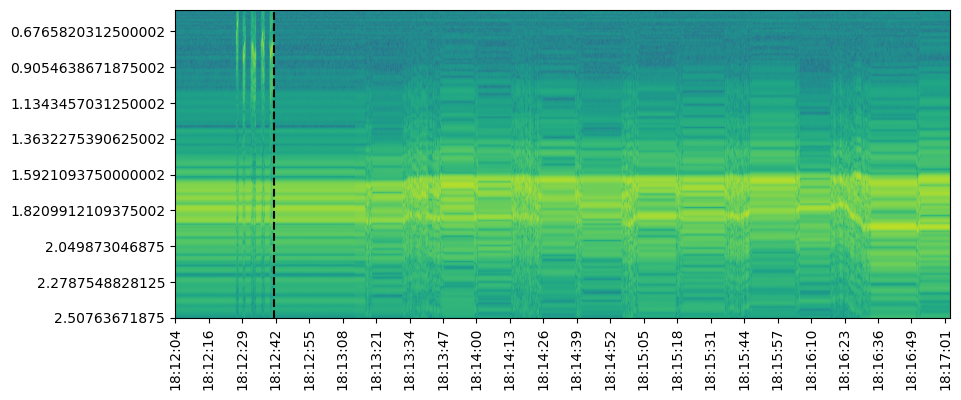

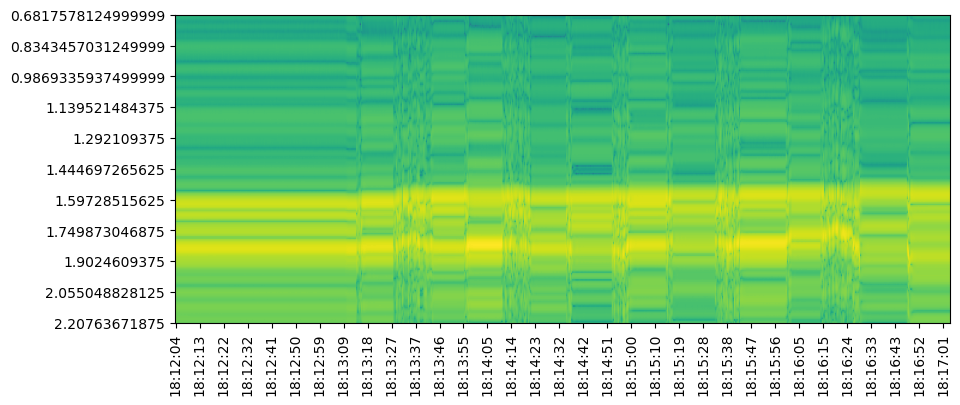

In [7]:
fa = 'kuka_stare_decon_Ka-Scat20231002-181204.nc'

fu = 'kuka_stare_decon_Ku-Scat20231002-181013.nc'

time_addition = datetime.timedelta(seconds=0)

ka_times = [(12,42)]
vlines = [datetime.datetime(2023,10,2,18,a,b)+time_addition for (a,b) in ka_times]

kt.plot_file(fa,'ka',time_offset_s=0,vlines = vlines,directory=directory)

ku_times = []
vlines = [datetime.datetime(2023,10,2,18,a,b)+time_addition for (a,b) in ku_times]

kt.plot_file(fu,'ku',time_offset_s=-0+111,vlines=vlines,directory=directory)

# Voice recording indicates that 18:12:42 kuka time is equal to 12:20:53 on phone

local_delta = datetime.datetime(2023,10,2,18,12,42)-datetime.datetime(2023,10,2,12,20,53)
local_delta

Loc 1
ka 12,21,07
ku 12,21,26

Loc 2
ka 12,21,55
ku 12,22,10

Loc 3
ka 12,22,32
ku 12,22,47

Loc 4
ka 12,23,10
ku 12,23,28

Loc 5
ka 12,23,54
ku 12,24,15

Loc 6
ka 12,24,51
ku 12,25,05

Loc 7
ka 12,25,25
ku 12,25,42

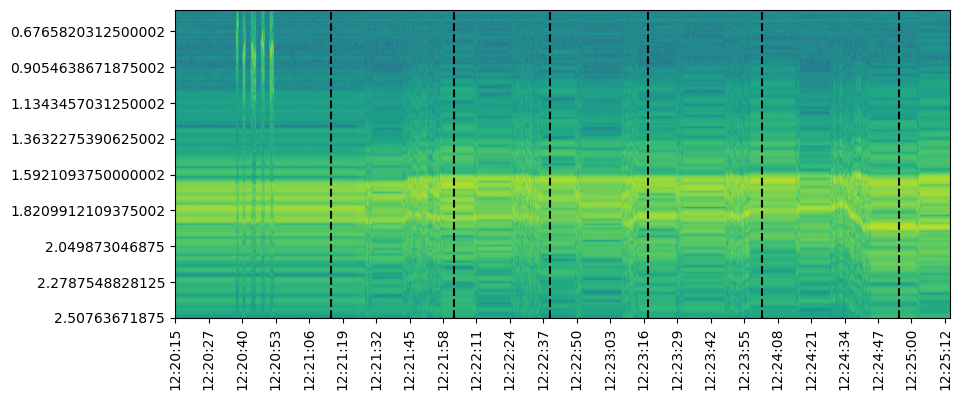

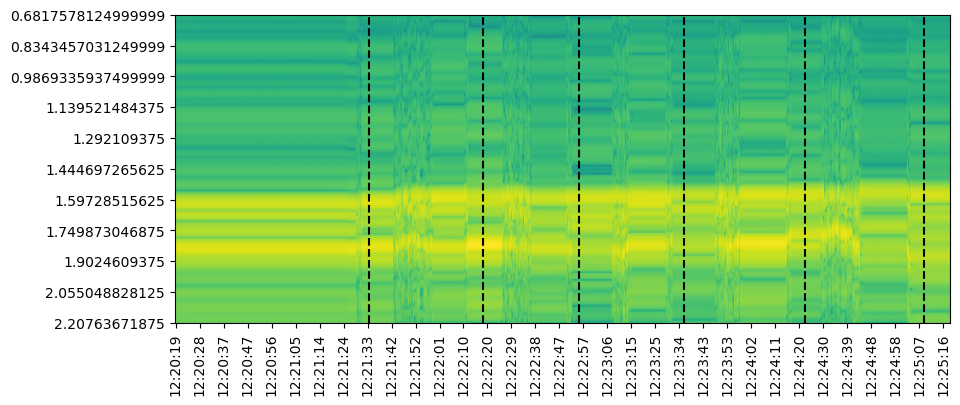

In [8]:
fa = 'kuka_stare_decon_Ka-Scat20231002-181204.nc'

fu = 'kuka_stare_decon_Ku-Scat20231002-181013.nc'

time_addition = datetime.timedelta(seconds=8)

ka_times = [(21,7),(21,55),(22,32),(23,10),(23,54),(24,47)] #Change last from (24,51) to (24,47)
vlines = [datetime.datetime(2023,10,2,12,a,b)+time_addition for (a,b) in ka_times]
            # ,(25,25)

ka_inds = kt.plot_file(fa,'ka',time_offset_s=-local_delta.seconds,vlines = vlines,directory=directory)

ku_times = [(21,26),(22,10),(22,47),(23,28),(24,15),(25,1)]
vlines = [datetime.datetime(2023,10,2,12,a,b)+time_addition for (a,b) in ku_times]
# ,(25,42)

ku_inds = kt.plot_file(fu,'ku',time_offset_s=-local_delta.seconds+115,vlines=vlines,directory=directory)

pit_numbers = [1,2,3,4,5,6]


ku_files = [fu]*len(pit_numbers)
ka_files = [fa]*len(pit_numbers)


for pitno, ka_ind, ku_ind, ka_file, ku_file in zip(pit_numbers,ka_inds,ku_inds,ka_files,ku_files):

    pits[pitno] = {}
    pits[pitno]['ka'] = ka_ind
    pits[pitno]['ku'] = ku_ind
    pits[pitno]['ka_file'] = ka_file
    pits[pitno]['ku_file'] = ku_file

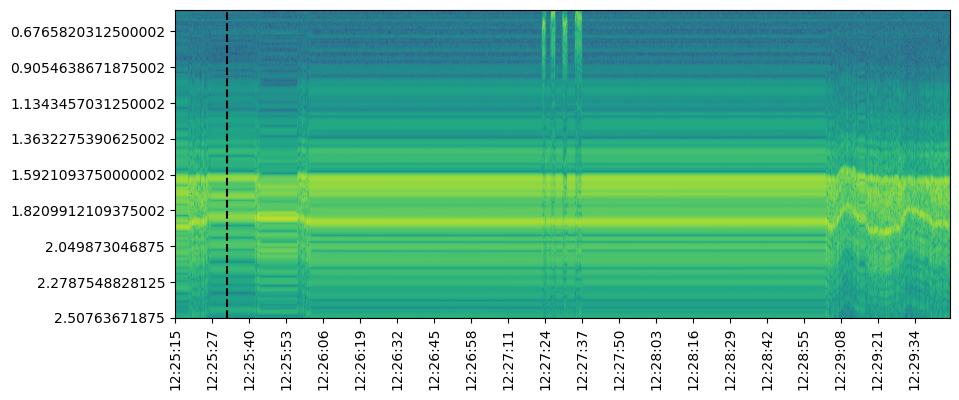

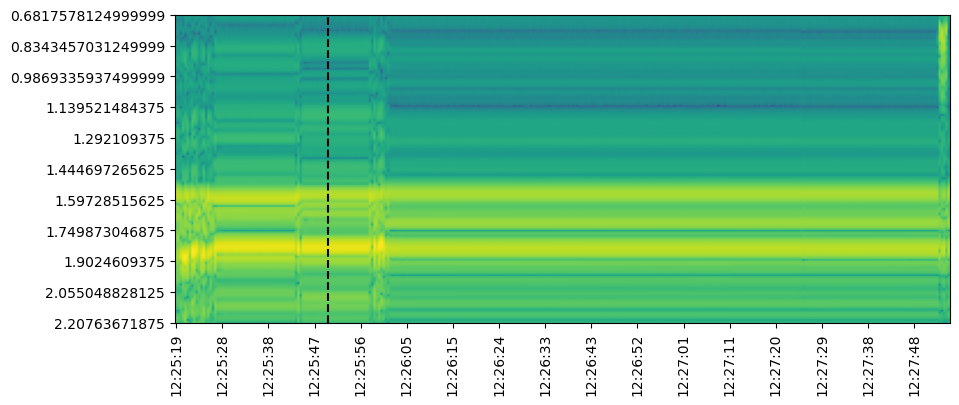

In [10]:
fa = 'kuka_stare_decon_Ka-Scat20231002-181704.nc'

fu = 'kuka_stare_decon_Ku-Scat20231002-181513.nc'

time_addition = datetime.timedelta(seconds=8)

ka_times = [(25,25)]
vlines = [datetime.datetime(2023,10,2,12,a,b)+time_addition for (a,b) in ka_times]

ka_inds = kt.plot_file(fa,'ka',time_offset_s=-local_delta.seconds,vlines = vlines,directory=directory)

ku_times = [(25,42)]
vlines = [datetime.datetime(2023,10,2,12,a,b)+time_addition for (a,b) in ku_times]

ku_inds = kt.plot_file(fu,'ku',time_offset_s=-local_delta.seconds+115,vlines=vlines,directory=directory)

pit_numbers = [7]


ku_files = [fu]*len(pit_numbers)
ka_files = [fa]*len(pit_numbers)


for pitno, ka_ind, ku_ind, ka_file, ku_file in zip(pit_numbers,ka_inds,ku_inds,ka_files,ku_files):

    pits[pitno] = {}
    pits[pitno]['ka'] = ka_ind
    pits[pitno]['ku'] = ku_ind
    pits[pitno]['ka_file'] = ka_file
    pits[pitno]['ku_file'] = ku_file

In [11]:
pols = ['hh','vv','hv','vh']

for pitno, data_dict in pits.items():

    y,m,day = kt.get_ymd_from_filename(pits[pitno]['ku_file'])
    
    for freq in ['ka','ku']:

        with Dataset(f'{directory}/{data_dict[f"{freq}_file"]}') as d:
            
            ranges = np.array(d['range'])

            start_ind = pits[pitno][freq]
            end_ind = start_ind+5

            for pol in pols:
            
                pits[pitno][f'{freq}_{pol}'] = np.mean(np.array(d[f'{pol}_power_decon0'])[:,start_ind:start_ind+5],axis=1)
                pits[pitno][f'{freq}_range'] = ranges

In [12]:
for freq in ['ka','ku']:

    for h in pits.keys():
    
        data = pits[h]
    
        dic = {pol:data[f'{freq}_{pol}'] for pol in pols}
        
        wvfms = pd.DataFrame(dic)
    
        wvfms.to_csv(f'../data/waveforms/Hangar_2023102_{h}_{freq}.csv')